# Problema 5: Rutas Óptimas para Equipos de Inspección de infraestrutura en Colombia
## 1. Conjuntos
$V$ para los nodos/localidades a visitar
## 2. Parámetros
$C$, Una matriz con los costos las localidades. Cada lugar i,j indica el costo entre el nodo i y nodo j
## 3. Variables de decisión
 $X_{ij}$ binaria, donde 1 quiere decir que el camino entre i y j fue seleccionado como parte del camino.
## 4. Función objetivo
$min\sum_{i\in V}^{}\sum_{j\in V}^{} c_{ij}x_{ij}$
## 5. Restricciones
#### Que todos los nodos j sean seleccionados
$\sum_{j\in V}^{}x_{ij}\forall i\in V$
#### Que todos los nodos i sean seleccionados
$\sum_{i\in V}^{}x_{ij}\forall j\in V$
## 6. Tipo de problema
MIP, pues 

In [3]:
from __future__ import division
from pyomo.environ import *
import pandas as pd
import csv
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pyomo.environ as pyo
from pyomo.opt import SolverFactory
import sys
import os
os.system("clear")

def read_cost_matrix_csv(filename):
    """
    Reads a cost matrix from a CSV file and returns it as a numpy array.
    
    The first row of the CSV is assumed to contain the node IDs.
    
    Parameters:
        filename (str): Name of the input CSV file.
    
    Returns:
        numpy.ndarray: The cost matrix read from the file.
    """
    with open(filename, 'r', newline='') as csvfile:
        reader = csv.reader(csvfile)
        # Read the first row to get the node IDs.
        node_ids = next(reader)
        # Read the remaining rows as data.
        data = list(reader)
    
    # Convert the data to a numpy array.
    cost_matrix = np.array(data, dtype=int)
    
    return cost_matrix

cost = read_cost_matrix_csv("datosTSP\cost_matrix_5_nodes_2.5_spread.csv")
numNodes = cost.shape[0]

Model = ConcreteModel()

# SETS & PARAMETERS********************************************************************
N=RangeSet(1, numNodes)

# VARIABLES****************************************************************************
Model.x = Var(N,N, domain=Binary)

Model.u = Var(N, bounds=(1,numNodes-1), domain=NonNegativeIntegers) 

# OBJECTIVE FUNCTION*******************************************************************
Model.obj = Objective(expr = sum(Model.x[i,j]*cost[i-1,j-1] for i in N for j in N), sense= minimize)

# CONSTRAINTS**************************************************************************
Model.res1=ConstraintList()
for i in N:
        Model.res1.add(sum(Model.x[i,j] for j in N if i !=j )==1)


Model.res2=ConstraintList()
for j in N:
        Model.res1.add(sum(Model.x[i,j] for i in N if i !=j )==1)

Model.res3=ConstraintList()
for i in N:
    for i in N:
        Model.res3.add(Model.x[i, i] == 0)

Model.res4=ConstraintList()
for i in N:
    for j in N:
        if i != j and i != 1 and j != 1:
            Model.res4.add(Model.u[i] - Model.u[j] + (numNodes-1)*Model.x[i,j] <= numNodes-2)
    

    
# APPLYING THE SOLVER******************************************************************
SolverFactory('glpk').solve(Model)

Model.display()





Model unknown

  Variables:
    x : Size=25, Index=[1:5]*[1:5]
        Key    : Lower : Value : Upper : Fixed : Stale : Domain
        (1, 1) :     0 :   0.0 :     1 : False : False : Binary
        (1, 2) :     0 :   0.0 :     1 : False : False : Binary
        (1, 3) :     0 :   0.0 :     1 : False : False : Binary
        (1, 4) :     0 :   0.0 :     1 : False : False : Binary
        (1, 5) :     0 :   1.0 :     1 : False : False : Binary
        (2, 1) :     0 :   0.0 :     1 : False : False : Binary
        (2, 2) :     0 :   0.0 :     1 : False : False : Binary
        (2, 3) :     0 :   0.0 :     1 : False : False : Binary
        (2, 4) :     0 :   1.0 :     1 : False : False : Binary
        (2, 5) :     0 :   0.0 :     1 : False : False : Binary
        (3, 1) :     0 :   0.0 :     1 : False : False : Binary
        (3, 2) :     0 :   1.0 :     1 : False : False : Binary
        (3, 3) :     0 :   0.0 :     1 : False : False : Binary
        (3, 4) :     0 :   0.0 :     1 : 

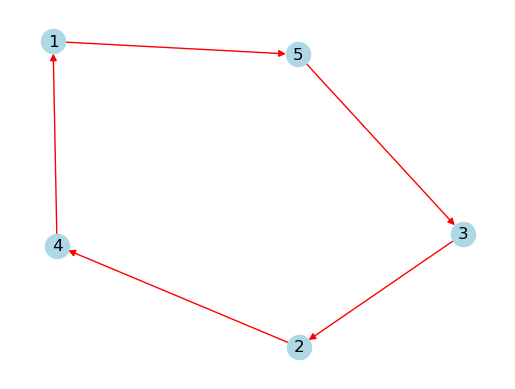

In [6]:
def plot_solution(model):
    """
    Plots the solution as a directed graph using NetworkX and matplotlib.
    Since there's only one route (single driver), all edges are colored the same.
    """
    valid_edges = []
    for i in N:
        for j in N:
            if pyo.value(model.x[i, j]) > 0.5:
                valid_edges.append((i, j))

    # Build a directed graph
    G = nx.DiGraph()
    G.add_nodes_from(N)

    # Add edges from the solution
    for (i, j) in valid_edges:
        G.add_edge(i, j)

    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True,
                     node_color='lightblue',
                     edge_color='red',
                     arrows=True)
    plt.axis("off")
    plt.show()

# Plot the solution
plot_solution(Model)